<a href="https://colab.research.google.com/github/willisg25/Stat24/blob/main/Willis_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Random Number Generator

In [3]:
#CDF PDF

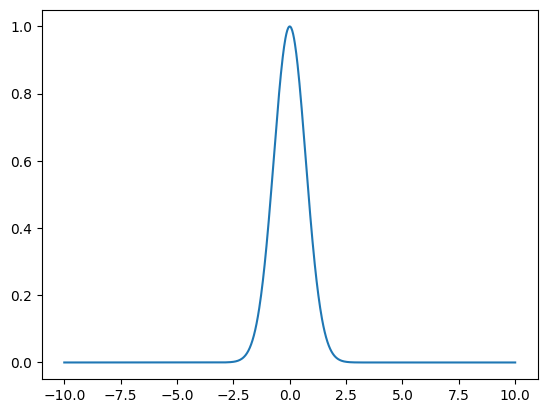

In [4]:
x = np.linspace(-10,10,1000) # generate 1000 x values within a rand of -10 to 10
y = 2.71**(-x**2) # create y values based on the x values above
plt.plot(x,y) # plot relation

$e^{-x^2}$

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [5]:
# defining a function to calculate the probability density function
def normal_pdf(x,mu,sigma):

  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))

In [6]:
x = np.linspace(-6,6,1000) # generate 1000 x values from 6 to -6

In [7]:
x

array([-6.        , -5.98798799, -5.97597598, -5.96396396, -5.95195195,
       -5.93993994, -5.92792793, -5.91591592, -5.9039039 , -5.89189189,
       -5.87987988, -5.86786787, -5.85585586, -5.84384384, -5.83183183,
       -5.81981982, -5.80780781, -5.7957958 , -5.78378378, -5.77177177,
       -5.75975976, -5.74774775, -5.73573574, -5.72372372, -5.71171171,
       -5.6996997 , -5.68768769, -5.67567568, -5.66366366, -5.65165165,
       -5.63963964, -5.62762763, -5.61561562, -5.6036036 , -5.59159159,
       -5.57957958, -5.56756757, -5.55555556, -5.54354354, -5.53153153,
       -5.51951952, -5.50750751, -5.4954955 , -5.48348348, -5.47147147,
       -5.45945946, -5.44744745, -5.43543544, -5.42342342, -5.41141141,
       -5.3993994 , -5.38738739, -5.37537538, -5.36336336, -5.35135135,
       -5.33933934, -5.32732733, -5.31531532, -5.3033033 , -5.29129129,
       -5.27927928, -5.26726727, -5.25525526, -5.24324324, -5.23123123,
       -5.21921922, -5.20720721, -5.1951952 , -5.18318318, -5.17

In [8]:
mu = 0

In [9]:
sigma = 1

In [10]:
pdf = normal_pdf(x,mu,sigma)

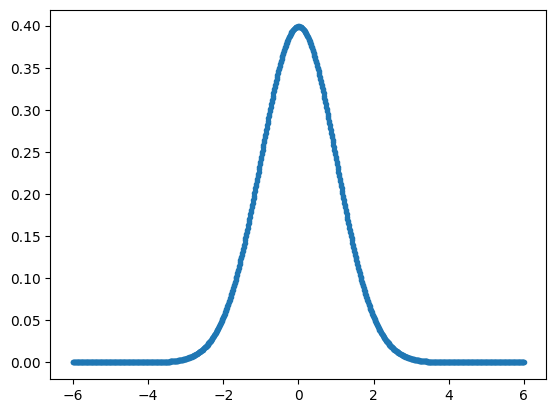

In [11]:
plt.plot(x,pdf,'.')
# plt.plot(x,y,'g.')

In [12]:
n= 5
x[0:n]
np.sum(x[0:n])

-29.879879879879876

In [13]:
def cumulative_sum(x): # defining cumulative sum to create and approximation for our CDF

  y = np.zeros(x.shape) # stores the cumulative sum values

  for n in range(x.shape[0]):

    y[n] = np.sum(x[0:n]) #updates array with curret PDF values up to index n

#   y = y / np.max(y)

  return y

In [14]:
z = np.array([1,2,3,4,5])

In [15]:
z

array([1, 2, 3, 4, 5])

In [16]:
cumulative_sum(z)

array([ 0.,  1.,  3.,  6., 10.])

In [17]:
cdf = cumulative_sum(pdf)

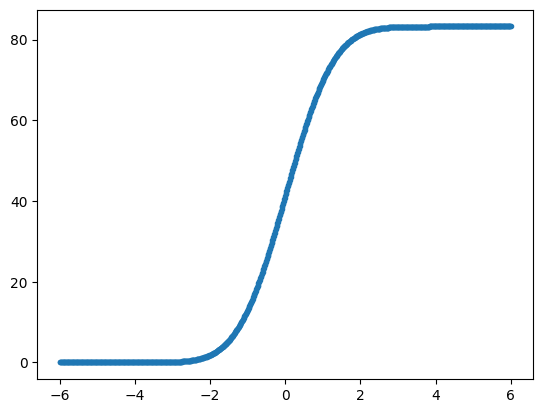

In [18]:
plt.plot(x,cdf,'.');

In [19]:
# d_cdf = cdf[1:] - cdf[0:-1] #Demo to show that the derivative of the cdf gives you back the pdf
# plt.plot(x[1:],d_cdf,'.');  #Not required for sampling

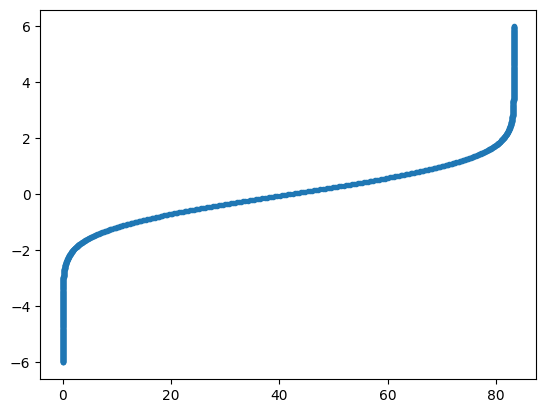

In [20]:
plt.plot(cdf,x,'.');

In [21]:
def find_nearest(array, value): #used to find nearest probabilty value to CDF

  idx = np.argmin(np.abs(array - value)) # fucntion to calculate the absolute difference between the value in array and given

  return idx

In [22]:
z = np.array([11.2,32,63,4.3,5.67])

In [23]:
find_nearest(z, 22.1)

1

In [24]:
z[1]

32.0

In [25]:
find_nearest(cdf, 0.1) #finding nearest CDF to .1

247

In [26]:
x[393]

-1.2792792792792795

In [27]:
xr = np.random.random((10000,)) # generates 10000 random numbers in range 1 to 0

In [28]:
r = np.random.random()

In [29]:
r

0.6627100704651311

In [30]:
x[find_nearest(cdf, r)]

-2.4084084084084085

In [31]:
w = np.zeros(xr.shape[0])

for i in range(xr.shape[0]):

  w[i] = x[find_nearest(cdf, xr[i])]

In [32]:
w.shape

(10000,)

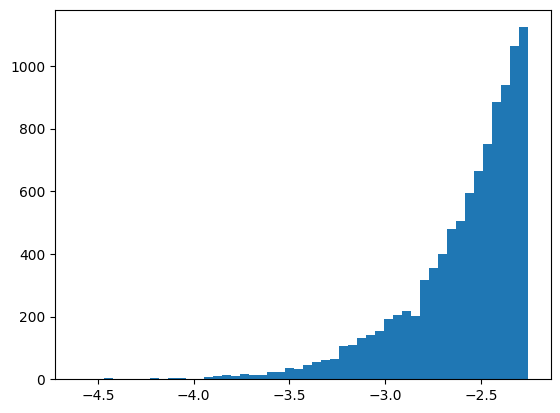

In [33]:
plt.hist(w,50);

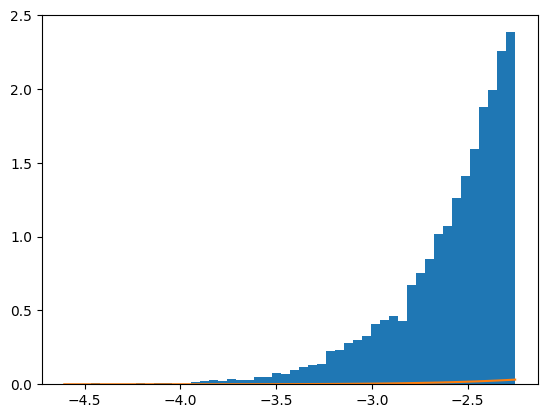

In [34]:
num_bins = 50
n,bins,patches = plt.hist(w, num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins,y)

# Homework

# Birthday Paradox

In [42]:
import random

def simulate_birthday_paradox(people, simulations): #definition of the function of the birthday paradox
    matches = 0

    for i in range(simulations):
        birthdays = [random.randint(1, 365) for _ in range(people)]
        if len(birthdays) != len(set(birthdays)): # checks for duplicate birthdays
            matches += 1 #if match is found, adds one to counter

    probability = matches / simulations
    return probability

# Number of people in the room
people = 5

# Number of simulations
simulations = 20000

# Calculate the probability
probability = simulate_birthday_paradox(people, simulations)
probability


0.02665

In [35]:
# In the code above, the probability that out of a given number of poeple, there will be a matching birthday is calculated.

# Monty Hall

In [47]:
def simulate_monty_hall_final(simulations):
    # counters for wins
    wins_switching = 0
    wins_staying = 0

    for _ in range(simulations):
        # Randomly assign the car to a door (1, 2, or 3)
        car_door = random.randint(1, 3)
        # Player makes an initial choice
        player_choice = random.randint(1, 3)

        # Host opens a door, which is neither the player's choice nor the car door
        for host_choice in [1, 2, 3]:
            if host_choice != car_door and host_choice != player_choice:
                break

        # Find the remaining door for the player to switch to
        for switch_choice in [1, 2, 3]:
            if switch_choice != player_choice and switch_choice != host_choice:
                break

        # Count the number of wins for staying with the initial choice
        if player_choice == car_door:
            wins_staying += 1

        # Count the number of wins for switching to the other door
        if switch_choice == car_door:
            wins_switching += 1

    # Calculate the probabilities of winning by staying and switching
    probability_staying = wins_staying / simulations
    probability_switching = wins_switching / simulations

    return probability_staying, probability_switching

# Running the final version of the simulation
final_probability_staying, final_probability_switching = simulate_monty_hall_final(simulations)
final_probability_staying, final_probability_switching


(0.33058, 0.66942)

# Simple Craps

In [46]:
def simulate_dice_game(simulations):
    wins = 0

    for _ in range(simulations):
        # Roll two six-sided dice
        roll = random.randint(1, 6) + random.randint(1, 6)

        # Check for immediate win or loss
        if roll in [7, 11]: # WIN
            wins += 1
            continue
        elif roll in [2, 3, 12]: #LOSS
            continue

        # Save the initial roll
        initial_roll = roll

        # Re-roll phase
        while True:
            roll = random.randint(1, 6) + random.randint(1, 6)
            if roll == 7:  # Loss condition
                break
            elif roll == initial_roll:  # Win condition
                wins += 1
                break

    probability_of_winning = wins / simulations
    return probability_of_winning

# Number of simulations
simulations = 50000

# Calculate the probability
probability_of_winning = simulate_dice_game(simulations)
probability_of_winning


0.49154

# Collector's Card Paradox


In [48]:
def simulate_card_collectors_problem(n, simulations):
    total_card_packs_bought = 0

    for _ in range(simulations):
        collected_characters = set()
        card_packs_bought = 0

        # Buy card packs until all characters are collected
        while len(collected_characters) < n:
            new_card = random.randint(1, n)
            collected_characters.add(new_card)
            card_packs_bought += 1

        total_card_packs_bought += card_packs_bought

    # Calculate the average number of card packs needed
    average_card_packs_needed = total_card_packs_bought / simulations
    return average_card_packs_needed

# Number of different characters
n = 10

# Calculate the expected number of card packs
expected_card_packs = simulate_card_collectors_problem(n, simulations)
expected_card_packs


29.36176

In [51]:
import random

def simulate_sock_drawer_problem(n, simulations):
    total_draws = 0

    for _ in range(simulations):
        socks = {}
        draws = 0

        while True:
            # Randomly draw a sock
            sock_color = random.randint(1, n)
            draws += 1

            # Update the count for this color
            if sock_color in socks:
                socks[sock_color] += 1
            else:
                socks[sock_color] = 1

            # Check for a pair
            if socks[sock_color] == 2:
                break

        total_draws += draws

    # Calculate the average number of draws needed
    average_draws_needed = total_draws / simulations
    return average_draws_needed

# Number of pairs of socks
n = 20

# Number of simulations
simulations = 100000

# Calculate the expected number of draws
expected_draws = simulate_sock_drawer_problem(n, simulations)
expected_draws


6.27843